# Implimentation of mini-Batch Gradient Descent (BGD) algorithem in TensorFlow
- Nalinda Kulathunga (nalinda05kl@gmail.com). <br>
Texas Southern University.
*****
(NOTE: Index for the number of data entries : $i$ ($i_{max} = m$), Index for the number of features: $j$ ($j_{max} = n$))
- ####  General (expected) equation with optimized (OP) weights : <br>
$y^{i}$ = $\theta_{0}^{op}x_{0}^{i} + \theta_{1}^{op}x_{1}^{i} + ....... + \theta_{n}^{op}x_{n}^{i}$ <br>
where, $y^{i}$ is the target for the $i^{th}$ data entry and $x_{j}^{i}$ is the $j^{th}$ feature value of $i^{th}$ data entry.
- #### Matrix reperesentation: <br>
$\hat{\textbf{y}} = \textbf{X}\theta$ <br>
$\left[ \begin{array}{cccc} y^{1} \\ y^{2} \\ \vdots \\ y^{m}\end{array} \right]$ = $\left[ \begin{array}{cccc}
x_{0}^{1} & x_{1}^{1} & \ldots & x_{n}^{1} \\
x_{0}^{2} & x_{1}^{2} & \ldots & x_{n}^{2} \\
\vdots & \vdots & \ldots & \vdots \\
x_{0}^{m} & x_{1}^{m} & \ldots & x_{n}^{m} \\
\end{array} \right]$ 
$\left[ \begin{array}{cccc} 
\theta_{0} \\
\theta_{1} \\
\vdots \\
\theta_{n} \\
\end{array} \right]$
- #### Weights : <br>
$\theta_{j}$, ($\theta_{0}$ is the bias term)
- #### Predicted $i^{th}$ target can be written as :  <br>
$y_{pred}^{i}$ = $\sum_{j=0}^n \theta_{j} x_{j}^{i}$ <br><br>
For all targets, by using the matrix dot product, <br> $\hat{\textbf{y}}_{pred}$ = $\theta^{T} . X$ <br>
Using the matrix product, <br> $\hat{\textbf{y}}_{pred}$ = $X\theta$
- #### Mean Square Error (MSE) cost function for linear regression model
$MSE(X,\theta)$ = $\frac{1}{m} \sum_{i=0}^{m} (\theta^{T}.x^{(i)} - y^{(i)})^{2}$
- #### Partial derivative of the cost function
$\frac{\partial}{\partial \theta_{j}} MSE(X,\theta)$ = $\frac{2}{m} \sum_{i=0}^{m} (\theta^{T}.x^{(i)} - y^{(i)}) . x_{j}^{(i)}$ <br>
In general matrix form, with all gradients: <br>
$\nabla_{\theta} MSE(\theta)$ $=$ $\frac{2}{m}X^{T}(X\theta - \textbf{y})$
- #### Schematic which shows the BGD approach ($w = \theta$ and $j(w) = MSE(\theta)$) [4] :
<img src="Grad_Des_01.png",width=600, height=600>
- #### Optimization algorithem with a learning rate - $\eta$
$\theta^{(next)}$ = $\theta^{(now)} - \eta \nabla_{\theta} MSE(\theta)$
- #### NOTE: In mini-BGD, data and targets (X and y) are fed in to the model as randomly selected mini-batches in each epoch for the training. Since we use small samples of the data set as input, this is a kind of approximation meathod. We try to approximate the gadient of the whole data set using a small sample. It usually come to a faster convergence but not necessarily with a good accuracy.
- #### Mini batches [5]:
<img src="Mini_batches.png",width=500, height=500>
****
- #### References:
1. Hands on machine learning with Scikit-Learn & TensorFlow, by Aurelien Geron (2017)
2. TensorFlow documentation : https://www.tensorflow.org/
3. Jypyter Notebook : https://jupyter.org/
4. Gradient descent approach figure : rasbt.github.io
5. Mini batches figure : https://www.jeremyjordan.me/gradient-descent/
***


In [1]:
import tensorflow as tf
import numpy as np

In [2]:
# Downloading the dataset:
from sklearn.datasets import fetch_california_housing

In [3]:
housing = fetch_california_housing()
m, n = housing.data.shape

In [4]:
print "Feature space shape: {}".format(housing.data.shape)
print "Target space shape: {}".format(housing.target.shape)

Feature space shape: (20640, 8)
Target space shape: (20640,)


#### Please note that, I haven't divided the data set in to "training" and "testing". I have only implimented the changes to the BGD algirithm in order to in put mini batches in each trainning epoch using tensorFlow placeholders.

In [5]:
print "X = {}".format(housing.data[:5])

X = [[ 8.32520000e+00  4.10000000e+01  6.98412698e+00  1.02380952e+00
   3.22000000e+02  2.55555556e+00  3.78800000e+01 -1.22230000e+02]
 [ 8.30140000e+00  2.10000000e+01  6.23813708e+00  9.71880492e-01
   2.40100000e+03  2.10984183e+00  3.78600000e+01 -1.22220000e+02]
 [ 7.25740000e+00  5.20000000e+01  8.28813559e+00  1.07344633e+00
   4.96000000e+02  2.80225989e+00  3.78500000e+01 -1.22240000e+02]
 [ 5.64310000e+00  5.20000000e+01  5.81735160e+00  1.07305936e+00
   5.58000000e+02  2.54794521e+00  3.78500000e+01 -1.22250000e+02]
 [ 3.84620000e+00  5.20000000e+01  6.28185328e+00  1.08108108e+00
   5.65000000e+02  2.18146718e+00  3.78500000e+01 -1.22250000e+02]]


In [6]:
print "y = {}".format(housing.target[:5])

y = [4.526 3.585 3.521 3.413 3.422]


In [7]:
#Scaling the data and adding the bias term:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(housing.data)
scaled_housing_data = scaler.transform(housing.data)
scaled_housing_data_plus_bias = np.c_[np.ones((m, 1)), scaled_housing_data]

In [8]:
print "X = {}".format(scaled_housing_data_plus_bias[:5])

X = [[ 1.          2.34476576  0.98214266  0.62855945 -0.15375759 -0.9744286
  -0.04959654  1.05254828 -1.32783522]
 [ 1.          2.33223796 -0.60701891  0.32704136 -0.26333577  0.86143887
  -0.09251223  1.04318455 -1.32284391]
 [ 1.          1.7826994   1.85618152  1.15562047 -0.04901636 -0.82077735
  -0.02584253  1.03850269 -1.33282653]
 [ 1.          0.93296751  1.85618152  0.15696608 -0.04983292 -0.76602806
  -0.0503293   1.03850269 -1.33781784]
 [ 1.         -0.012881    1.85618152  0.3447108  -0.03290586 -0.75984669
  -0.08561576  1.03850269 -1.33781784]]


In [9]:
# The batch size is defined below. After that, the number of batches can be calculated.
batch_size = 100
n_batches = int(np.ceil(m/batch_size))

In [10]:
from random import randint

# The function defined below can fetch randomly selected batches one by one to the taining in each epoch.
def fetch_batch(batch_size):
    dummy = randint(0, n_batches)
    X_batch = scaled_housing_data_plus_bias[dummy*batch_size:(dummy + 1)*batch_size]
    y_batch_bs = housing.target[dummy*batch_size:(dummy + 1)*batch_size]
    y_batch = y_batch_bs.reshape(-1, 1)
    return X_batch, y_batch

In [11]:
# Number of iterations (epochs) and the learning rate:
n_epochs = 10000
learning_rate = 0.01

In [12]:
# Preparing the tensors for the session ahead:
# We use placehodders available in tensorFolw and feed them with mini-batches of data in the training.

X = tf.placeholder(tf.float32, shape=(None, n+1), name="X")
y = tf.placeholder(tf.float32, shape=(None, 1), name="y")

theta       = tf.Variable(tf.random_uniform([n + 1, 1], -1.0, 1.0), name="theta")
y_pred      = tf.matmul(X, theta, name="predictions")
error       = y_pred - y
mse         = tf.reduce_mean(tf.square(error), name="mse")

# For the error evaluation on each mini-batch (but using global theta)
mse_var     = tf.Variable(tf.zeros([]), name="mse_var")
mse_update  = tf.assign(mse_var, mse)

gradients   = (float(2))/(float(m)) * (tf.matmul(tf.transpose(X), error))
training_op = tf.assign(theta, theta - learning_rate * gradients)

## If you like to test, you may also use MomentumOptimizer insted of gradient descent without momentum:
## For that just comment the "gradients" and "training_op" lines above and add the following lines.
#optimizer = tf.train.MomentumOptimizer(learning_rate=learning_rate, momentum=0.5)
#training_op = optimizer.minimize(mse)

In [13]:
# Shapes/names of tensors:
print "Feature space : {}".format(X)
print "Target space : {}".format(y)
print "Weights space : {}".format(theta)
print "Predicted targets : {}".format(y_pred)
print "Error metrix : {}".format(error)
print "Gradients matrix : {}".format(gradients)

Feature space : Tensor("X:0", shape=(?, 9), dtype=float32)
Target space : Tensor("y:0", shape=(?, 1), dtype=float32)
Weights space : <tf.Variable 'theta:0' shape=(9, 1) dtype=float32_ref>
Predicted targets : Tensor("predictions:0", shape=(?, 1), dtype=float32)
Error metrix : Tensor("sub:0", shape=(?, 1), dtype=float32)
Gradients matrix : Tensor("mul:0", shape=(9, 1), dtype=float32)


In [14]:
# For the error evaluation on the whole data set:
def error_eval(best_theta_in):
    X_AllData = tf.constant(scaled_housing_data_plus_bias, dtype=tf.float32, name="X_AllData")
    error_final = tf.matmul(X_AllData, best_theta_in) - housing.target.reshape(-1, 1)
    mse_final = tf.reduce_mean(tf.square(error_final), name="mse")
    return mse_final.eval()

In [15]:
# Initialization of the tensorflow variables:
init = tf.global_variables_initializer()

In [16]:
n_epochs = n_epochs + 1
MiniBatch_mses = []
Global_mses = []
with tf.Session() as sess:
    sess.run(init)
    
    for epoch in range(n_epochs):
        for batch_index in range(n_batches):
            X_batch, y_batch = fetch_batch(batch_size)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
            sess.run(mse_update, feed_dict={X:X_batch, y:y_batch})
            
        if epoch % 20 == 0:
            print ("#"),
        if epoch % 500 == 0:
            best_theta = theta.eval()
            mse_from_glob = error_eval(best_theta)
            print ("\t Epoch ({}) ==>\n MSE(mini batch) {}, \t MSE(all data) {}.\n".format(epoch, mse_var.eval(), mse_from_glob))
            MiniBatch_mses.append(mse_var.eval())
            Global_mses.append(mse_from_glob)
            
    best_theta_final = theta.eval()
    print "\n\n Best weights : \n {}".format(best_theta_final)

# 	 Epoch (0) ==>
 MSE(mini batch) 8.28019618988, 	 MSE(all data) 6.57006406784.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (500) ==>
 MSE(mini batch) 0.192980691791, 	 MSE(all data) 0.631258666515.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (1000) ==>
 MSE(mini batch) 0.292459666729, 	 MSE(all data) 0.550955474377.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (1500) ==>
 MSE(mini batch) 0.197238981724, 	 MSE(all data) 0.531727969646.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (2000) ==>
 MSE(mini batch) 0.596978664398, 	 MSE(all data) 0.526758849621.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (2500) ==>
 MSE(mini batch) 0.767757594585, 	 MSE(all data) 0.525185585022.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (3000) ==>
 MSE(mini batch) 0.48306325078, 	 MSE(all data) 0.524624884129.

# # # # # # # # # # # # # # # # # # # # # # # # # 	 Epoch (3500) ==>
 MSE(mini batch) 0.182113826275, 	 MSE(al

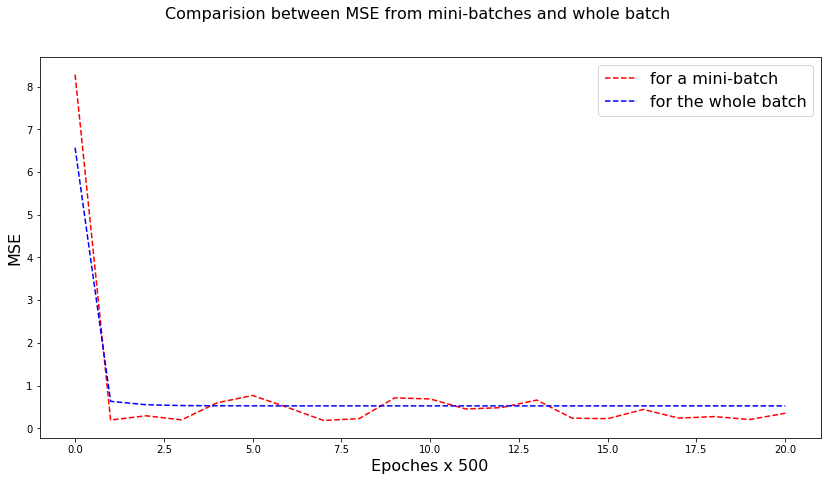

In [34]:
import matplotlib.pyplot as plt
x_list = list(range(21))
fig = plt.figure(figsize=(14,7))
fig.suptitle('Comparision between MSE from mini-batches and whole batch', fontsize=16)
plt.xlabel('Epoches x 500', fontsize=16)
plt.ylabel('MSE', fontsize=16)
    
plt.plot(x_list, MiniBatch_mses, 'r--', x_list, Global_mses, 'b--')
plt.gca().legend(('for a mini-batch','for the whole batch'), fontsize=16)
plt.show()